# 2.9 Building and Booting an Operating System

It is possible to desing, code, and implement an operating system specifically for one speicific machine configuration. More commonly, however, operating systems are designed to run on any of a class of machines with a variety of peripheral configurations.

### 2.9.1 Operating System Generation

Most commonly, a computer system, when purchased, has an operating system already installed. For example, you may purchase a new laptop with Windows or macOS preinstalled. But suppose you wish to repalce the preinstalled operating system or add additional operating systems. Or suppose you purshase a computer without an operating system. In these latter situations, you have a few options for placing the appropriate operating system on the computer and configuring it for use. 
 If you are generating an operating system from scratch, you must follow these steps:

1. Write the operating system source code
2. Configure the operating system for the system on which it will run
3. Compile the operating system
4. Install the operating system
5. Boot the computer and its new operating system

COnfiguring the system involves specifying, which features will be included, and this varies by operating system. Typically, parameteres describing how the system is configured is stored in a configuration file of some type, and once this file is created, it can be used in several ways.

At one extreme, a system administrator can use it to modify a copy of the operating system source code. Then the operating system is compeletely compiled (known as a system build). Data declarations, initializations, and constants, along with compilation, produce an output-object version of the operating system that is tailored to the system described in the configuration file.

At a slightly less tailored level, the system description can lead to the selection of precompiled object modules from an existing library. These modules are linked together to from the generated operating system. This process allows the library to contain the device drivers for all supported I/O devices, but only those needed are selected and linked into the operating system. Because the system is not recompiled, system generation is faster, but the resulting system may b eoverly general and may not support different hardware configurations. At the other extreme, it is possible to oconstruct a system that is compeletely modular. here, selection occurs at execution time rather than at compile or link time. System gereantion involves simply setting the parameters that describe the system configuration.

The major differences among these approaches are the size and generality of the generated system and the ease of modifying it as the hardware configuration changes. For embedded systems, it is not uncommon to adopt the first approach and create an operating system for a specific, static hardware configuration. However, most modern operating systems that support desktop and laptop computers as well as mobile devices have adopted the second approach. That is, the operating system is still generated for a specific hardware configuration, but the use of techniques such as loadable kernel modules provides modular support for dynamic changes to the system.

### 2.9.2 System Boot

After an operating system is generated, it must be made available foor use by the hardware. But how does the hardware know where the kernel is or how to load that kernel? The process of starting a computer by loading the kernel is known as booting the system. On most systems, the boot process proceeds as follows:

1. A small piece of code known as the bootstrap program or boot loader locates the kernel
2. The kernel is loaded into memory and started
3. The kernel initilizes hardware
4. The root file system is mounted

Some computer system use a multistage boot process: When the computer is first powered on, a small boot loader located in nonvolatile firmware known as BIOS is run. This initial boot loader usually does nothing more than load a second boot loader, which is located at a fixed disk location called the boot block. The program stored in the boot block may be sophisticated enough to load the entire operating system into memory and begin its execution. More typically, it is simple code and knows only the address on disk and the length of the remainder of the bootstrap program. 
Manry recent computer systems have replaced the BIOS-based boot process with UEFI(Unified Extensible Frimware Interface). UEFI has several advantages over BIOS, including better support for 64-bit systems and larger disks. Perhaps the greatest advantage is that UEFI is a single, complete boot mangaer and therefore is faster than the multistage BIOS boot process.

Whether botting from BIOS or UEFF, the bootstrap program can perrom a variety of tasks. In addidtion to loading the file containing the kernel program into memory, inspecting memory and the CPU and discovering devices. If the diagnostics pass, the program can continue with the booting steps. The bootstrap can also initialize all aspects of the system, from CPU registers to device controllers and the contents of main memory. Sooner or later, it starts the operating system and mounts the root file system. It is only at this point is the system said to be running.

GRUB is an open source bootstrap program for Linux and UNIX systems. Boot parameters for the system are set in a GRUB configuration file, which is loaded at startup. GRUB is flexible and allows changes to be made at boot time, including modifying kernel parameters and even selecting among different kernles that can be booted. As an example, the following are kernel parameters from the special Linux file /proc/cmdline, which is used at boot time:

```
BOOT IMAGE=/boot/vmlinuz-4.4.0-59-generic 
root=UUID=5f2e2232-4e47-4fe8-ae94-45ea749a5c92
``` 

BOOT_IMAGE is the name of the kernel image to be loaded into memory, and root specifies a unique identifier of the root file system.

To save space as well as decrease boot time, the Linux kernel image is a compressed file that is extracted after it is loaded into memory. During the boot process, the boot loader typically creates a temporary RAM file system, known as initramfs. This file system contains necessary drivers and kernel modules that must be installed to support the real root file system (which is not in main memory). Once the kernel has started and the necessary drivers are installed, the kernel switches the root file system from the temporary RAM location ot the appropriate root file system location. Fianlly, Linux creates the systemd process, the initial process in the system, and then starts other services. Ultimately, the system will present the user with a login prompt. In Section 11.5.2, we describe the boot process for Windows.

It is worthwhile to note that the booting mechanism is not independent from the boot loader. Therefore, there are specific versions of the GRUB boot loader for BIOS and UEFI, and the firmware must know as well which specific bootloader is to be used.

The boot process for mobile systems is slightly different from that for traditional PCs. For example, although its kernel is Linux-based, Android does not use GRUB and instead leavers it up to vendors to provide boot loaders. The most common Android boot loader is LK (for "liitle kernel"). Android systems use the same compressed kernel image as Linux, as well as an initail RAM file system. However, whereas Linux discards the initramfs once all necessary drivers have been loaded, Android maintains initramfs as the root file system for the device. Once the kernel has been loaded and the root file system mounted, Android starts the init process and creates a number of services before displaying the home screen.

## 2.10 Operating System Debugging

We have mentioned debugging from time to time in this chapter. Here, we take a closer look. Broadly, debuggin is the activity of finding and fixing errors in a system, both in hardware and in software. Performance problems are considered bugs, so debuggin can also include performance tuning, which seeks to improve performance by removing processing bottlenecks. In this section, we explore debugging process and kernel errors and performance problems. Hardware debugging is outside the scope of this text.

### 2.10.1 Failure Analysis

If a process fails, most operating systems write the error information to a log fil to alert system administrators or users that the problem occurred. The operating system can also take a core dump, a capture of the memory of the process and store it in a file for later analysis.

### 2.10.2 Performance Monitoring and Tuning

We mentioned earlier that performance tuning seeks to improve performance by removing processing bottlenecks. To identify bottlenecks, we must be able to monitor system performance. Thus ,the operating system must have some means of computing and displaying measures of system behavior. Tools may be chracterized as providing either per-process or system-wide observations. To make these observations, tools may use one of two approaches - counters or tracing. We explore each of these in the following sections.

#### 2.10.2.1 Counters

Operaint systems keep track of system activity through a series of counters, such as the number of system calls made or the number of operations performed to a network device or disk. The following are examples of Linux tools that use counters

Per-process
- ps : reports information for a single process or selection of processes
- top : reports real-time statistics for current processes

System-wide
- vmstats : reports memory-usage statistics
- netstat : network interfaces
- iostat : I/O usage for disks

### 2.10.3 Tracing

Whereas counter-based tools simply inquire on the current value of certain ststaistics that are maintained by the kernel, tracing tools collect data for a specific event - such as the steps inlvolved in a system-call invocation. The following are examples of Linux tools that trace events:

Per-process
- strace : traces system calls invoked by a process
- gdb : a source level debugger

System-wide
- perf : a collection of Linux perfomance tools
- tcpdump : collects network packets

### 2.10.4 BCC

Debuggin the interactions between user-level and kernel code is nearly ompossible without a toolset that understands both sets of code and can instrument their interactions. For that toolset to be truly useful, it must be able to debug any area of a system, including areas that were not written with debugging in mind, and do so without affecting system reliability. This toolset must also have minimal performance impact during use. The BCC toolkit meets these requirements and provides a dynamic, secure, low-impact debugging environment. 
BCC(BPF Compiler Collection) is a rich toolkit that provides tracing features for Linux systems. BCC is a front-end interface to the eBPF(extended Berkeley Packet Filter) tool. The BPF technology was developed in the early 1990s for filtering traffic across a computer network. The "extended" BPF added various features to BPF. eBPF programs are written in a subset of C and are compiled into eBPF instructions, which can be dynamically inserted into a running Linux system. The eBPF instructions can be used to capture specific events (such as a certain system call being invoked) or to monitor system performance (such as the time required to perform disk I/O). To ensure that eBPF instructions are well behaved, they are passed through a verifie before being inserted into the running Linux kernel. The verifier checks to make sure that the instructions do not affect system performance or security.

Although eBPF provides a rich set of features for tracing within the Linux kernel, it traditionally has been very difficult to develop programs using its C interface. BCC was developed to make it easier to write tools using eBPF by providing a front-end interface in Python. A BCC tool is written in PYthon and it embeds C code that interfaces with the eBPF instrumentation, which in turn interfaces with the kernel. The BCC tool also compiles the C program into eBPF instructions and insert it into the kernel using either probes or tracepoints, two techniques that allow tracing events in the Linux kernel.

The specifics of writing custom BCC tools are beyond the scope of this text, but the BCC package (which is installed on the Linux virtual machine we provide) provides a number of existing tools that monitor several areas of activity in a running Linux kernel. As an example, the BCC disksnoop tool traces disk I/O activity, Entering the command.

# Ch 3 Processes

## 3.1 Process Concept

A question that arises in discussing operating systems involves what to call all the CPU activities. Early computers were batch systems that executed jobs, followed by the emergence of time-shared systems that ran user programs, or tasks. Even on a single-user system, a user may be ablt to run several programs at one time: a word processor, a web browser, and an e-mail package. And even if a computer can exeute only one program at a time, such as on an embedded device that does not support multitasking, the operating system may need to support its own internal programmed activities, such as memory management. In many respects, all these activities are similar, so we call all of them processes. Although we personlly prefer the more contemporary term process, the term jo has historical significance, as much of operating system theory and terminology was developed during a time when the major activity of operating systems was job processing. Therefore, in some appropriate instances we use job when describing the role of the operating system. As an example, it would be mesleading to avoid the use of commonly accepted terms that include the word job simply because process has superseded job.

### 3.1.1 The Process

Informally, as mentioned earlier, a process is a program in execution. The status of the current activity of a process is represented by the value of the program counter and the contents of the processr's registers. The memory layout of a process is typically divided into multiple sections, and is shown in Figure 3.1.

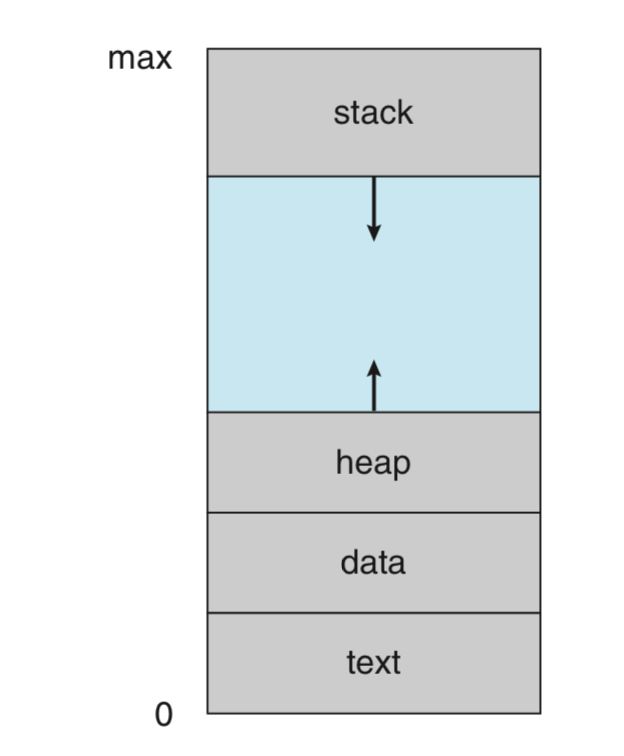

- text
- data
- heap
- stack

Notice that the sizes of the text and data sections are fixed, as their sizes do not change during program run time. However, the stack and heap sections can shrink and grow dynamically during program execution. Each time a function is called, an activation record containing function paragmeters, local variables, and the return address is pushed onto the stack; when control is returned from the function, the activation record is popped from the stack. Similarly, the heap will grow as memory is dynamically allocated, and will shring when memory is returned to the system. Although the stack and geap sections grow toward one another, the operating system must ensure they do not overlap one another.

We emphasize that a program by itself is not a process. A program is a passive entity, such as a file containing a list of instructions stored on disk passive entity, such as a file containing a list of instructions stored on disk (often called an executable fil). In contrast, a process is an active entity, with a program counter specifying the next instruction to execute and a set of associated resources. A program becomes a process when an executable file is loaded into memory. Two common techniques for loading executable files are double-clicking an icon representing the executable file and entering the name of the executable file on the command line.

Although two processes may be associated with the same program, they are nevertheless considered two separate execution sequences. For instance, several users may be running different copies of the mail program, or the same user may invode many copies of the web browser program. Each of these is a separate process; and altought the text sections are equivalent, the data, heap, and stack sections vary. It is also common to have a process that spawns many processses as it runs. We discuss such matters in Sections 3.4.

Note that a process can itself be an execution environment for other code. The java programming environment provides a good example. In most circumstances, an executable Java program is executed within the Java virtual machine. The JVM executes as a process that interprets the loaded Java code and takes actions on behalf of that code.

### 3.1.2 Process State

As a process exeuctes, it changes state. The state of a process is defined in part by the current activity of the process. A process may be in one of the following states:

p145